# Premier réseau de convolution (LeNet)

In [1]:
# Append module location to sys.path
import sys, pathlib, os
pkg_path = pathlib.Path().cwd().parent
sys.path.append(pkg_path.as_posix())
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import pathlib
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Activation, MaxPool2D
from keras.utils.image_dataset import image_dataset_from_directory, dataset_utils, ALLOWLIST_FORMATS
from yawbcc.datasets import load_barcelona_wbc

Nous chargeons 2 jeu de données pour l'entrainement et la validation sur l'ensemble des données disponibles. Les images sont réduites à 28x28 comme pour les données MNIST, ce qui entraîne une grande perte d'information.

In [3]:
meta = load_barcelona_wbc()

DATA_DIR = pathlib.Path.home() / 'yawbcc_data'

train_ds, valid_ds = image_dataset_from_directory(DATA_DIR / 'barcelona', validation_split=0.2, subset='both', 
                                                  image_size=(28, 28), batch_size=128, crop_to_aspect_ratio=True,
                                                  seed=2022)

# Pour passer à 13 classes, sans toucher l'arborescence, utilisez le code ci-dessous à la place
# image_paths, _, _ = dataset_utils.index_directory('/home/damien/yawbcc_data/barcelona', None, formats=ALLOWLIST_FORMATS)
# labels = [pathlib.Path(pth).name.split('_')[0] for pth in image_paths]
# labels, classes = pd.factorize(labels)
# train_ds, valid_ds = image_dataset_from_directory(DATA_DIR / 'barcelona', list(labels), validation_split=0.2, subset='both', 
#                                                   image_size=(28, 28), batch_size=100, crop_to_aspect_ratio=True, shuffle=False)


Found 17092 files belonging to 8 classes.
Using 13674 files for training.
Using 3418 files for validation.


Nous construisons un premier réseau de convolution LeNet pour valider le pipeline de modélisation. Nous n'espérons pas avoir de bons résultats avec un tel modèle mais cela permet de préparer l'environnement pour la création de modèles CNN plus robustes.

In [4]:
# LeNet: source https://en.wikipedia.org/wiki/LeNet
model = Sequential(name="LeNet")
model.add(Conv2D(filters=6, kernel_size=(5, 5), padding='same', activation='sigmoid', input_shape=(28, 28, 3)))
model.add(MaxPool2D(strides=2))
model.add(Conv2D(filters=16, kernel_size=(5,5), padding='valid', activation='sigmoid'))
model.add(MaxPool2D(strides=2))
model.add(Flatten())
model.add(Dense(120, activation='sigmoid'))
model.add(Dense(84, activation='sigmoid'))
model.add(Dense(13, activation='softmax'))
model.summary()

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Model: "LeNet"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         456       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 6)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 16)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 400)               0         
                                                                 
 dense (Dense)               (None, 120)               48120 

In [5]:
history = model.fit(train_ds, validation_data=valid_ds, epochs=20)

Epoch 1/20
107/107 [==============================] - 3s 15ms/step - loss: 2.0824 - accuracy: 0.1790 - val_loss: 2.0072 - val_accuracy: 0.1908
Epoch 2/20
107/107 [==============================] - 2s 13ms/step - loss: 1.9991 - accuracy: 0.2067 - val_loss: 1.8991 - val_accuracy: 0.3049
Epoch 3/20
107/107 [==============================] - 2s 13ms/step - loss: 1.5615 - accuracy: 0.4212 - val_loss: 1.3594 - val_accuracy: 0.4939
Epoch 4/20
107/107 [==============================] - 2s 14ms/step - loss: 1.3019 - accuracy: 0.4964 - val_loss: 1.2765 - val_accuracy: 0.5158
Epoch 5/20
107/107 [==============================] - 2s 14ms/step - loss: 1.2406 - accuracy: 0.5154 - val_loss: 1.2770 - val_accuracy: 0.4912
Epoch 6/20
107/107 [==============================] - 2s 14ms/step - loss: 1.2019 - accuracy: 0.5306 - val_loss: 1.1712 - val_accuracy: 0.5372
Epoch 7/20
107/107 [==============================] - 2s 14ms/step - loss: 1.1724 - accuracy: 0.5405 - val_loss: 1.1769 - val_accuracy: 0.5228

Finalement, la précision (accuracy) du modèle n'est pas si mauvaise. Nous obtenons un honorable 72% de bons résultats sur le jeu de données de validation.

<AxesSubplot: >

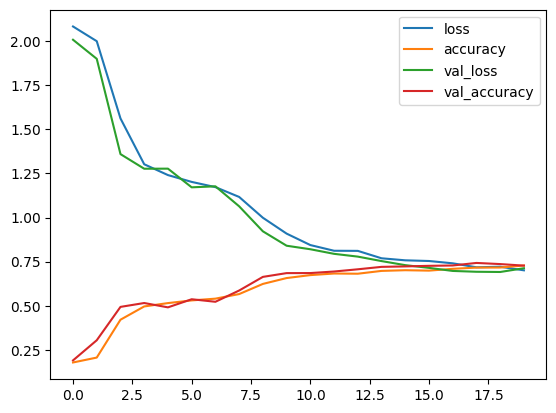

In [6]:
pd.DataFrame(history.history).plot()